### Lottery Predictor for Panama played numbers

The goal is to find patterns in data and create a model that can predict the next number to be played in the lottery.

In [36]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
#load data
lottery_data = pd.read_csv('NumerosJugadosPanama.csv')
lottery_data.head()

,Tipo de sorteo,Fecha,Primer Premio,Letras,Serie,Folio,Segundo Premio,Tercer Premio
0,Dominical,1/10/2023,9076,CBAD,21,8,8719,2534
1,Intermedio,4/10/2023,9066,ACAB,4,11,3720,9941
2,Dominical,9/10/2023,1600,CAAC,22,11,348,4120
3,Dominical,15-10-2023,6012,BACC,25,15,1099,2766
4,Dominical,22-10-2023,7691,CDCC,22,13,7485,308


In [78]:
# Fixing the lottery numbers to ensure they are in a four-digit format
lottery_data['Primer Premio'] = lottery_data['Primer Premio'].apply(lambda x: f'{x:04d}')
lottery_data['Segundo Premio'] = lottery_data['Segundo Premio'].apply(lambda x: f'{x:04d}')
lottery_data['Tercer Premio'] = lottery_data['Tercer Premio'].apply(lambda x: f'{x:04d}')

# Standardizing the date format
lottery_data['Fecha'] = pd.to_datetime(lottery_data['Fecha'], dayfirst=True).dt.strftime('%Y-%m-%d')

# Display the modified dataframe to verify changes
lottery_data.head()


,Tipo de sorteo,Fecha,Primer Premio,Letras,Serie,Folio,Segundo Premio,Tercer Premio
0,Dominical,2023-10-01,9076,CBAD,21,8,8719,2534
1,Intermedio,2023-10-04,9066,ACAB,4,11,3720,9941
2,Dominical,2023-10-09,1600,CAAC,22,11,0348,4120
3,Dominical,2023-10-15,6012,BACC,25,15,1099,2766
4,Dominical,2023-10-22,7691,CDCC,22,13,7485,0308


In [39]:
#Lets Create a new csv file with the modified data
lottery_data.to_csv('NumerosJugadosPanama_Modified.csv', index=False)

In [40]:
Lottery_Model = pd.read_csv('NumerosJugadosPanama_Modified.csv')
Lottery_Model.head()

,Tipo de sorteo,Fecha,Primer Premio,Letras,Serie,Folio,Segundo Premio,Tercer Premio
0,Dominical,2023-10-01,9076,CBAD,21,8,8719,2534
1,Intermedio,2023-10-04,9066,ACAB,4,11,3720,9941
2,Dominical,2023-10-09,1600,CAAC,22,11,348,4120
3,Dominical,2023-10-15,6012,BACC,25,15,1099,2766
4,Dominical,2023-10-22,7691,CDCC,22,13,7485,308


In [41]:
lottery_data.head()

,Tipo de sorteo,Fecha,Primer Premio,Letras,Serie,Folio,Segundo Premio,Tercer Premio
0,Dominical,2023-10-01,9076,CBAD,21,8,8719,2534
1,Intermedio,2023-10-04,9066,ACAB,4,11,3720,9941
2,Dominical,2023-10-09,1600,CAAC,22,11,0348,4120
3,Dominical,2023-10-15,6012,BACC,25,15,1099,2766
4,Dominical,2023-10-22,7691,CDCC,22,13,7485,0308


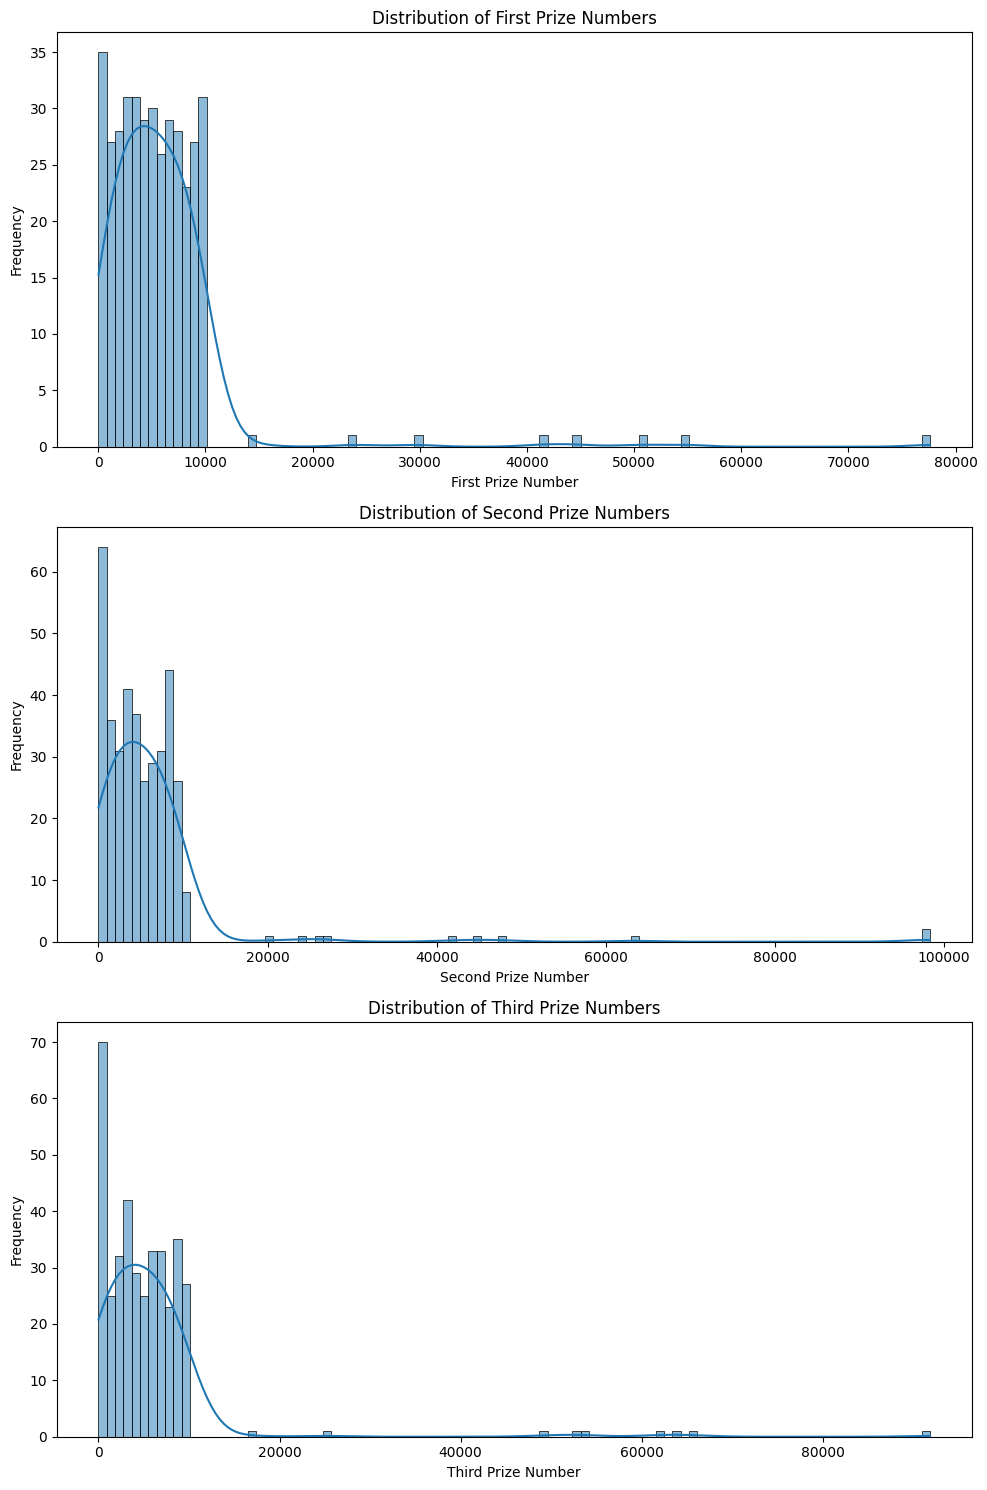

(count      383.000000
 mean      5717.535248
 std       6640.799032
 min         25.000000
 25%       2462.000000
 50%       4957.000000
 75%       7585.500000
 max      77610.000000
 Name: Primer Premio, dtype: float64,
 count      383.000000
 mean      5692.467363
 std       8920.245805
 min          0.000000
 25%       1818.500000
 50%       4317.000000
 75%       7444.000000
 max      98327.000000
 Name: Segundo Premio, dtype: float64,
 count      383.000000
 mean      5634.297650
 std       8645.308273
 min          0.000000
 25%       1898.500000
 50%       4457.000000
 75%       7307.000000
 max      91863.000000
 Name: Tercer Premio, dtype: float64)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Exploratory Data Analysis
# We'll look at the distribution of the lottery numbers and other relevant statistics

# Convert the lottery number columns to integers for analysis
lottery_data['Primer Premio'] = lottery_data['Primer Premio'].astype(int)
lottery_data['Segundo Premio'] = lottery_data['Segundo Premio'].astype(int)
lottery_data['Tercer Premio'] = lottery_data['Tercer Premio'].astype(int)

# Descriptive statistics for each prize
stats_primer_premio = lottery_data['Primer Premio'].describe()
stats_segundo_premio = lottery_data['Segundo Premio'].describe()
stats_tercer_premio = lottery_data['Tercer Premio'].describe()

# Histograms for each prize
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(lottery_data['Primer Premio'], bins=100, ax=axs[0], kde=True)
axs[0].set_title('Distribution of First Prize Numbers')
axs[0].set_xlabel('First Prize Number')
axs[0].set_ylabel('Frequency')

sns.histplot(lottery_data['Segundo Premio'], bins=100, ax=axs[1], kde=True)
axs[1].set_title('Distribution of Second Prize Numbers')
axs[1].set_xlabel('Second Prize Number')
axs[1].set_ylabel('Frequency')

sns.histplot(lottery_data['Tercer Premio'], bins=100, ax=axs[2], kde=True)
axs[2].set_title('Distribution of Third Prize Numbers')
axs[2].set_xlabel('Third Prize Number')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

(stats_primer_premio, stats_segundo_premio, stats_tercer_premio)


In [44]:
# EDA: Exploratory Data Analysis
lottery_data.describe()

,Primer Premio,Serie,Folio,Segundo Premio,Tercer Premio
count,383.000000,383.000000,383.000000,383.000000,383.000000
mean,5717.535248,11.702350,8.543081,5692.467363,5634.297650
std,6640.799032,6.943313,4.670572,8920.245805,8645.308273
min,25.000000,1.000000,1.000000,0.000000,0.000000
25%,2462.000000,6.000000,5.000000,1818.500000,1898.500000
50%,4957.000000,11.000000,8.000000,4317.000000,4457.000000
75%,7585.500000,18.000000,12.000000,7444.000000,7307.000000
max,77610.000000,26.000000,25.000000,98327.000000,91863.000000


In [48]:
from collections import Counter

def extract_pairs(number):
    """ Extracts all possible pairs of digits from a 4-digit number """
    number_str = str(number).zfill(4)
    return [number_str[i:i+2] for i in range(0, 3)]

def extract_trios(number):
    """ Extracts all possible trios of digits from a 4-digit number """
    number_str = str(number).zfill(4)
    return [number_str[i:i+3] for i in range(0, 2)]

# Extracting pairs and trios from the first prize numbers
pairs = [pair for number in lottery_data['Primer Premio'] for pair in extract_pairs(number)]
trios = [trio for number in lottery_data['Primer Premio'] for trio in extract_trios(number)]

# Frequency analysis for pairs and trios
pair_frequencies = Counter(pairs)
trio_frequencies = Counter(trios)

# Displaying the top 10 most common pairs and trios
top_10_pairs = pair_frequencies.most_common(10)
top_10_trios = trio_frequencies.most_common(10)

top_10_pairs, top_10_trios


([('00', 19),
  ('43', 19),
  ('31', 19),
  ('98', 18),
  ('95', 18),
  ('76', 17),
  ('11', 17),
  ('47', 17),
  ('34', 16),
  ('63', 16)],
 [('278', 4),
  ('985', 4),
  ('462', 4),
  ('266', 4),
  ('003', 4),
  ('076', 3),
  ('066', 3),
  ('600', 3),
  ('859', 3),
  ('721', 3)])

In [49]:
# Frequency analysis for the entire 4-digit numbers (quartets)
quartet_frequencies = Counter(lottery_data['Primer Premio'])

# Displaying the top 10 most common quartets (4-digit numbers)
top_10_quartets = quartet_frequencies.most_common(10)
top_10_quartets


[(9527, 2),
 (3084, 2),
 (3520, 2),
 (7606, 2),
 (6080, 2),
 (9016, 2),
 (7042, 2),
 (3640, 2),
 (8462, 2),
 (9858, 2)]

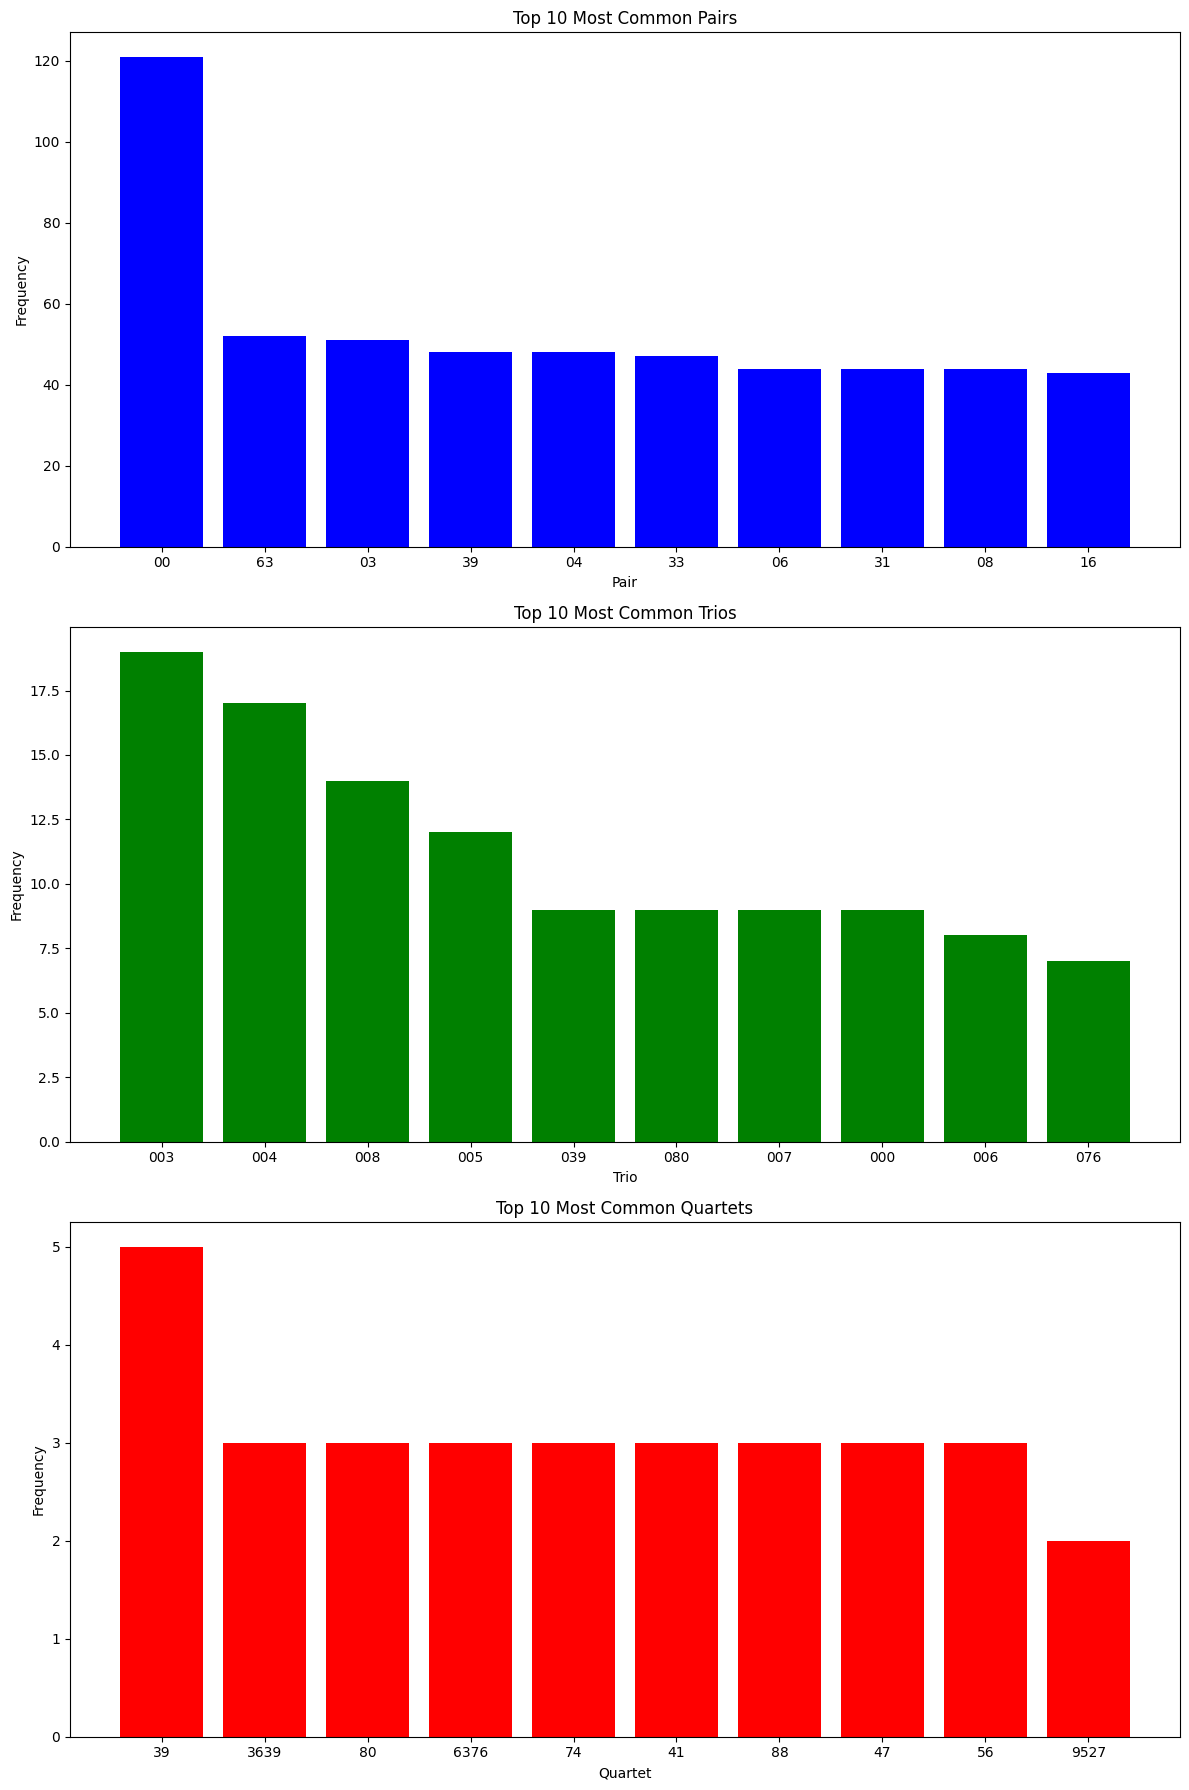

In [50]:
#Lets include all prizes
# Function to extract pairs and trios from a number
def extract_combinations(number, length):
    """ Extracts all possible combinations of a given length from a number """
    number_str = str(number).zfill(4)
    return [number_str[i:i+length] for i in range(0, 5 - length)]

# Extracting pairs, trios, and quartets from all three prizes
all_pairs = []
all_trios = []
all_quartets = []

for prize in ['Primer Premio', 'Segundo Premio', 'Tercer Premio']:
    for number in lottery_data[prize]:
        all_pairs.extend(extract_combinations(number, 2))
        all_trios.extend(extract_combinations(number, 3))
        all_quartets.append(number)

# Frequency analysis
pair_frequencies_all = Counter(all_pairs)
trio_frequencies_all = Counter(all_trios)
quartet_frequencies_all = Counter(all_quartets)

# Top 10 most common for pairs, trios, and quartets
top_10_pairs_all = pair_frequencies_all.most_common(10)
top_10_trios_all = trio_frequencies_all.most_common(10)
top_10_quartets_all = quartet_frequencies_all.most_common(10)

# Visual representation using bar plots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Pairs
axs[0].bar([pair[0] for pair in top_10_pairs_all], [pair[1] for pair in top_10_pairs_all], color='blue')
axs[0].set_title('Top 10 Most Common Pairs')
axs[0].set_xlabel('Pair')
axs[0].set_ylabel('Frequency')

# Trios
axs[1].bar([trio[0] for trio in top_10_trios_all], [trio[1] for trio in top_10_trios_all], color='green')
axs[1].set_title('Top 10 Most Common Trios')
axs[1].set_xlabel('Trio')
axs[1].set_ylabel('Frequency')

# Quartets
axs[2].bar([str(quartet[0]) for quartet in top_10_quartets_all], [quartet[1] for quartet in top_10_quartets_all], color='red')
axs[2].set_title('Top 10 Most Common Quartets')
axs[2].set_xlabel('Quartet')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [53]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Assuming we treat each digit as a separate feature
# We first need to split each number into its digits
def split_number_to_digits(number):
    return [int(digit) for digit in str(number).zfill(4)]

# Splitting all numbers into digits
all_numbers_split = lottery_data[['Primer Premio', 'Segundo Premio', 'Tercer Premio']].applymap(split_number_to_digits)
all_numbers_split = all_numbers_split.values.flatten()

# Creating a single list of all digits
all_digits = [digit for number in all_numbers_split for digit in number]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(all_digits).reshape(-1, 1))

# Defining the sequence length
sequence_length = 3

# Generating data for the LSTM model
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=1)

# Model architecture
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Determining the split point
split_percent = 0.80
split = int(split_percent * len(scaled_data))

# Splitting the data
train_data = scaled_data[:split]
test_data = scaled_data[split - sequence_length:]

# Creating training and testing sequences
train_sequence = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=1)
test_sequence = TimeseriesGenerator(test_data, test_data, length=sequence_length, batch_size=1)

# Train the model
model.fit(train_sequence, epochs=10)

Epoch 1/10
3695/3695 [==============================] - 77s 21ms/step - loss: 0.1064
Epoch 2/10
3695/3695 [==============================] - 64s 17ms/step - loss: 0.1056
Epoch 3/10
3695/3695 [==============================] - 75s 20ms/step - loss: 0.1058
Epoch 4/10
3695/3695 [==============================] - 73s 20ms/step - loss: 0.1060
Epoch 5/10
3695/3695 [==============================] - 81s 22ms/step - loss: 0.1059
Epoch 6/10
3695/3695 [==============================] - 74s 20ms/step - loss: 0.1057
Epoch 7/10
3695/3695 [==============================] - 69s 19ms/step - loss: 0.1059
Epoch 8/10
3695/3695 [==============================] - 69s 19ms/step - loss: 0.1056
Epoch 9/10
3695/3695 [==============================] - 70s 19ms/step - loss: 0.1057
Epoch 10/10
3695/3695 [==============================] - 72s 20ms/step - loss: 0.1057


In [57]:
#Evaluate the model
model.evaluate(test_sequence)

925/925 [==============================] - 4s 4ms/step - loss: 0.1048


0.10478286445140839

In [58]:
# Making predictions
predictions = model.predict(test_sequence)

# Inverse transform the predictions
predictions_inverse = scaler.inverse_transform(predictions)

# Compare with the actual values
actual_values = scaler.inverse_transform(test_data[sequence_length:])


925/925 [==============================] - 3s 3ms/step


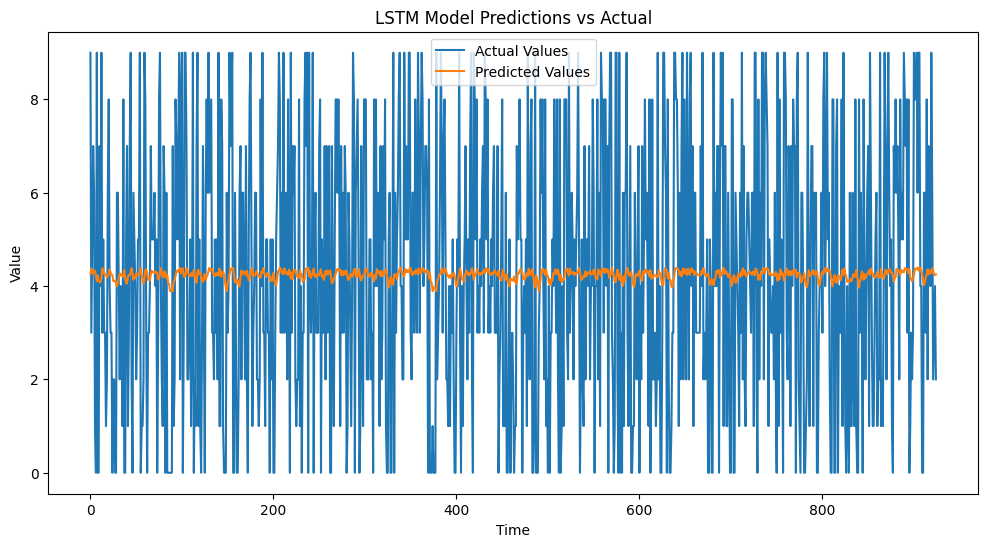

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Values')
plt.plot(predictions_inverse, label='Predicted Values')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [72]:
# Initialize the input sequence with a sequence from the test dataset
input_sequence = test_sequence[0][0]  # This selects the first sequence in the test data

predicted_number = []

for _ in range(4):
    # Predict the next digit
    predicted_scaled_digit = model.predict(input_sequence)
    predicted_digit = scaler.inverse_transform(predicted_scaled_digit)
    
    # Convert the predicted digit to an integer and add to the predicted number
    predicted_digit_int = int(predicted_digit[0][0])
    predicted_number.append(predicted_digit_int)
    
    # Update the input sequence
    # Add the predicted digit and remove the oldest digit
    new_digit_scaled = scaler.transform([[predicted_digit_int]])
    input_sequence = np.append(input_sequence[0][1:], new_digit_scaled).reshape(1, sequence_length, 1)

# Combine the predicted digits into a 4-digit number
predicted_4_digit_number = ''.join(map(str, predicted_number))
predicted_4_digit_number


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 22ms/step


'4444'

In [101]:
#Lets use the tensorflow approach
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
import numpy as np

# Assuming lottery_data is your DataFrame
# Convert lottery number columns to integers
lottery_data['Primer Premio'] = pd.to_numeric(lottery_data['Primer Premio'], errors='coerce')
lottery_data['Segundo Premio'] = pd.to_numeric(lottery_data['Segundo Premio'], errors='coerce')
lottery_data['Tercer Premio'] = pd.to_numeric(lottery_data['Tercer Premio'], errors='coerce')

# Handle potential NaN values after conversion
# You might want to drop these rows or fill them with a placeholder value
lottery_data.dropna(subset=['Primer Premio', 'Segundo Premio', 'Tercer Premio'], inplace=True)

# One-Hot Encoding for 'Tipo de sorteo'
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_draw_types = one_hot_encoder.fit_transform(lottery_data[['Tipo de sorteo']])

# Normalize the Date
lottery_data['Fecha'] = pd.to_datetime(lottery_data['Fecha'])
lottery_data['Days'] = (lottery_data['Fecha'] - lottery_data['Fecha'].min()).dt.days
scaler = MinMaxScaler()
scaled_days = scaler.fit_transform(lottery_data[['Days']])

# Preparing the Target Variable
# Here, we'll use the first prize as an example
# Convert to a range or category if needed, or use as is
y = lottery_data['Primer Premio'].values

# Combining the Encoded Draw Types and Scaled Days
X = np.hstack((encoded_draw_types, scaled_days))

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
print(f"Number of training samples: {X_train.shape[0]}")


Number of training samples: 306


In [106]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer: predicting a single value
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               1536      
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________


In [107]:
batch_size = 4

history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size ,validation_split=0.2)

Epoch 1/200


61/61 [==============================] - 1s 12ms/step - loss: 88036496.0000 - accuracy: 0.0000e+00 - val_loss: 84380112.0000 - val_accuracy: 0.0000e+00
Epoch 2/200
61/61 [==============================] - 0s 8ms/step - loss: 79340600.0000 - accuracy: 0.0000e+00 - val_loss: 56365252.0000 - val_accuracy: 0.0000e+00
Epoch 3/200
61/61 [==============================] - 0s 7ms/step - loss: 57467048.0000 - accuracy: 0.0000e+00 - val_loss: 50097552.0000 - val_accuracy: 0.0000e+00
Epoch 4/200
61/61 [==============================] - 0s 6ms/step - loss: 55461828.0000 - accuracy: 0.0000e+00 - val_loss: 47492424.0000 - val_accuracy: 0.0000e+00
Epoch 5/200
61/61 [==============================] - 0s 6ms/step - loss: 53553664.0000 - accuracy: 0.0000e+00 - val_loss: 46696484.0000 - val_accuracy: 0.0000e+00
Epoch 6/200
61/61 [==============================] - 0s 7ms/step - loss: 52491900.0000 - accuracy: 0.0000e+00 - val_loss: 45101008.0000 - val_accuracy: 0.0000e+00
Epoch 7/200
61/61 [==============

In [108]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

3/3 [==============================] - 0s 7ms/step - loss: 33222180.0000 - accuracy: 0.0000e+00
Test Loss: 33222180.0, Test Accuracy: 0.0


In [113]:
# Making predictions
predictions = model.predict(X_test)

# Displaying some predictions
for i in range(10):
    predicted_rounded = np.round(predictions[i][0])
    print(f"Actual: {y_test[i]}, Predicted: {predicted_rounded}")

3/3 [==============================] - 0s 6ms/step
Actual: 4511, Predicted: 3987.0
Actual: 9145, Predicted: 4771.0
Actual: 9118, Predicted: 4189.0
Actual: 7318, Predicted: 5023.0
Actual: 1305, Predicted: 4165.0
Actual: 129, Predicted: 5291.0
Actual: 83, Predicted: 5607.0
Actual: 1006, Predicted: 4964.0
Actual: 433, Predicted: 4564.0
Actual: 2468, Predicted: 4858.0
